In [40]:
import pandas as pd
from io import StringIO
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

In [41]:
# 提供从 Excel 复制过来的数据，转换为字符串格式
data = """
Position(mm)	g2
9.7	1.41774
9.75	1.42019
9.8	1.42241
9.85	1.39796
9.9	1.40962
9.95	1.41076
10	1.40516
10.05	1.39506
10.1	1.37499
10.15	1.34661
10.2	1.32741
10.25	1.27449
10.3	1.2457
10.35	1.21509
10.4	1.17309
10.45	1.14645
10.5	1.11085
10.55	1.09473
10.6	1.08427
10.7	1.04874
10.8	1.01977
10.9	1.01587
"""

# 使用 StringIO 将字符串转换为类似文件的对象
data_io = StringIO(data)

# 将数据读入 Pandas DataFrame 中
df = pd.read_csv(data_io, sep="\t")  # 用 Tab 键作为分隔符

# 查看 DataFrame
print(df)


    Position(mm)       g2
0           9.70  1.41774
1           9.75  1.42019
2           9.80  1.42241
3           9.85  1.39796
4           9.90  1.40962
5           9.95  1.41076
6          10.00  1.40516
7          10.05  1.39506
8          10.10  1.37499
9          10.15  1.34661
10         10.20  1.32741
11         10.25  1.27449
12         10.30  1.24570
13         10.35  1.21509
14         10.40  1.17309
15         10.45  1.14645
16         10.50  1.11085
17         10.55  1.09473
18         10.60  1.08427
19         10.70  1.04874
20         10.80  1.01977
21         10.90  1.01587


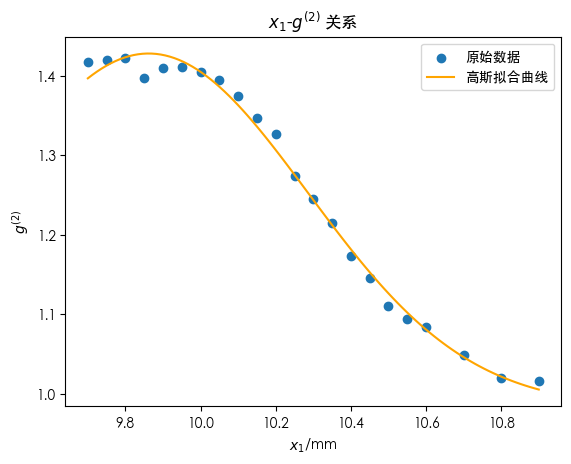

In [42]:
# 定义高斯函数
def gaussian(x, a, b, x0, sigma):
    return (a * np.exp(-(x - x0)**2 / (2 * sigma**2)))+b

# 提取数据
x_data = df['Position(mm)']
y_data = df['g2']

# 拟合高斯函数
popt, pcov = curve_fit(gaussian, x_data, y_data,p0 = [0.4,1,9.8,1])

# 生成拟合曲线数据
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = gaussian(x_fit, *popt)

# 绘制原始数据和拟合曲线
plt.scatter(x_data, y_data, label='原始数据')
plt.plot(x_fit, y_fit,color = 'orange', label='高斯拟合曲线')
plt.xlabel('$x_1$/mm')
plt.ylabel('$g^{(2)}$')
plt.title('$x_1$-$g^{(2)}$ 关系')
plt.legend()
plt.show()

In [43]:
#查看拟合参数
print(popt)

# 计算总平方和 (Total Sum of Squares)
ss_tot = np.sum((y_data - np.mean(y_data))**2)

# 计算残差平方和 (Residual Sum of Squares)
ss_res = np.sum((y_data - gaussian(x_data, *popt))**2)

# 计算决定系数 R^2
r_squared = 1 - (ss_res / ss_tot)

print(f"R^2: {r_squared}")

[0.44477209 0.98350793 9.86169977 0.42380823]
R^2: 0.9935427289210904


In [44]:
data = """
Position(mm)	G2
9.2	1.00312
9.4	1.0042
9.6	1.00398
9.8	1.00545
10	1.00907
10.2	1.01345
10.4	1.01402
10.95	1.01206
11.15	1.00773
11.25	1.00515
9.62	1.00347
10.62	1.0164
10.8	1.01523
10.9	1.01309
11	1.01042
11.1	1.00851
11.2	1.0052
11.3	1.00465
11.4	1.00371
11.5	1.00296
11.6	1.00222
11.7	1.00256
11.8	1.00299
11.9	1.00334
12	1.00321
12.1	1.0028
12.2	1.00343
12.3	1.00307
12.4	1.00244
12.5	1.00269
12.6	1.00255
12.7	1.00293
12.8	1.00266
12.9	1.00195
13	1.00371
13.1	1.00315
13.2	1.0027
13.3	1.0038
13.4	1.00315
13.5	1.00255
13.6	1.00306
13.7	1.00367
13.8	1.0042
13.9	1.00578
14.0 	1.00659
14.1	1.00827
14.2	1.01002
14.3	1.00865
14.4	1.01006
14.5	1.01006
14.6	1.00905
14.7	1.00903
14.8	1.0111
14.9	1.01256
15.0 	1.01202
15.1	1.012
15.2	1.01228
15.3	1.012
15.4	1.01234
15.5	1.01211
15.6	1.01078
15.7	1.00929
15.8	1.0099
15.9	1.00625
16.0 	1.00547
16.1	1.00395
16.2	1.0031
16.3	1.00271
16.4	1.00324
16.5	1.00305
"""
# 使用 StringIO 将字符串转换为类似文件的对象
data_io = StringIO(data)

# 将数据读入 Pandas DataFrame 中
df = pd.read_csv(data_io, sep="\t")  # 用 Tab 键作为分隔符

# 查看 DataFrame
print(df)

    Position(mm)       G2
0            9.2  1.00312
1            9.4  1.00420
2            9.6  1.00398
3            9.8  1.00545
4           10.0  1.00907
..           ...      ...
65          16.1  1.00395
66          16.2  1.00310
67          16.3  1.00271
68          16.4  1.00324
69          16.5  1.00305

[70 rows x 2 columns]


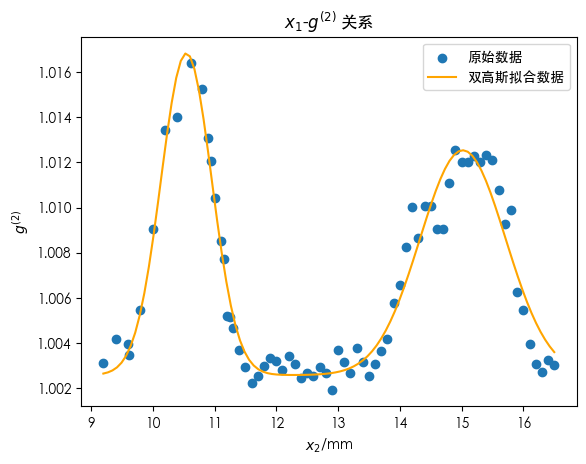

In [45]:
def double_gaussian(x, a1, x01, sigma1, a2, x02, sigma2, b):
    return (a1 * np.exp(-(x - x01)**2 / (2 * sigma1**2))) + (a2 * np.exp(-(x - x02)**2 / (2 * sigma2**2))) + b
#定义双高斯函数

# 提取数据
x_data = df['Position(mm)']
y_data = df['G2']

# 拟合高斯函数
popt, pcov = curve_fit(double_gaussian, x_data, y_data,p0 = [0.016,10.5,1,0.012,15,1.5,1])

# 生成拟合曲线数据
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = double_gaussian(x_fit, *popt)

# 绘制原始数据和拟合曲线
plt.scatter(x_data, y_data, label='原始数据')
plt.plot(x_fit, y_fit,color = 'orange', label='双高斯拟合数据')
plt.xlabel('$x_2$/mm')
plt.ylabel('$g^{(2)}$')
plt.title('$x_1$-$g^{(2)}$ 关系')
plt.legend()
plt.show()

In [46]:
#查看拟合参数
print(popt)

# 计算总平方和 (Total Sum of Squares)
ss_tot = np.sum((y_data - np.mean(y_data))**2)

# 计算残差平方和 (Residual Sum of Squares)
ss_res = np.sum((y_data - double_gaussian(x_data, *popt))**2)

# 计算决定系数 R^2
r_squared = 1 - (ss_res / ss_tot)

print(f"R^2: {r_squared}")

[1.42386180e-02 1.05440286e+01 4.11389334e-01 9.94760210e-03
 1.50195793e+01 6.93346010e-01 1.00258740e+00]
R^2: 0.9457289172152608
